# Exercício 4 da folha 7
## 3º ano de Licenciatura em Engenharia Física
### Universidade do Minho
Catarina Oliveira (a92831) e Diogo Gomes (a92848)

## Enunciado do exercício:
4. Os ficheiros folha7-data4.txt e folha7-data5.txt contêm as intensidades sonoras em função do tempo correspondentes a uma nota
musical tocada por um piano e um trompete. Calcule e represente os
primeiros 10 000 coeficientes de Fourier, discutindo os resultados obtidos. Há alguma vantagem em usar FFTs neste caso? Sabendo que as
ondas sonoras foram gravadas com uma frequência de amostragem de
44,1 kHz, qual a frequência da nota que foi tocada no piano? E no trompete?

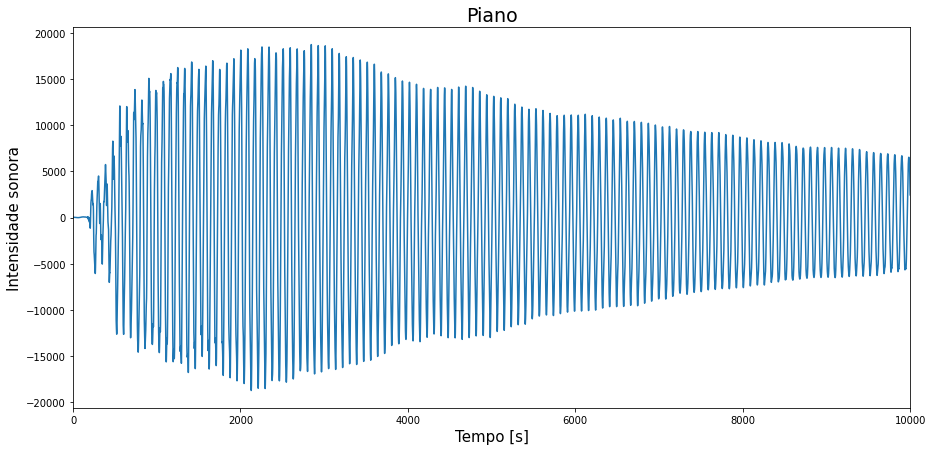

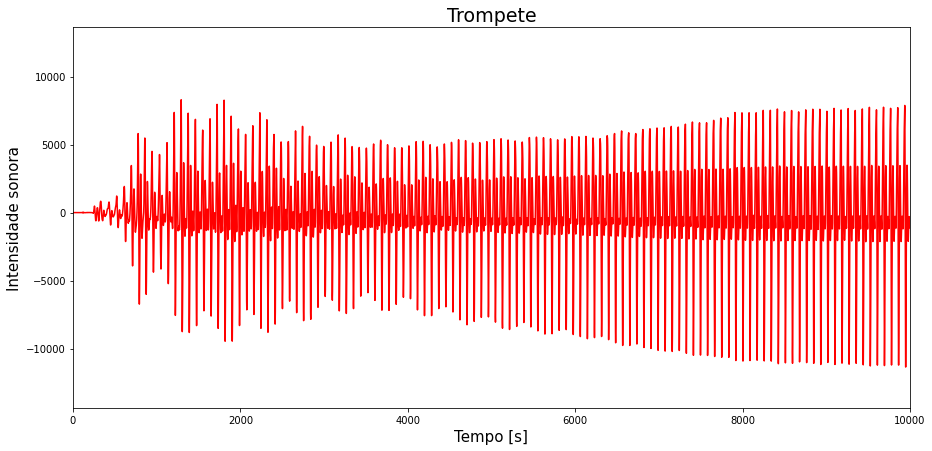

In [ ]:
import math
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

data_piano=np.loadtxt('folha7-data4.txt')
data_trompete=np.loadtxt('folha7-data5.txt')

plt.figure(figsize=[15,7])
plt.plot(data_piano)
plt.xlim(0,10000)
plt.title('Piano',fontsize=19)
plt.xlabel('Tempo [s]',fontsize=15)
plt.ylabel('Intensidade sonora',fontsize=15)
plt.show()

plt.figure(figsize=[15,7])
plt.plot(data_trompete, 'red')
plt.xlim(0,10000)
plt.title('Trompete',fontsize=19)
plt.xlabel('Tempo [s]',fontsize=15)
plt.ylabel('Intensidade sonora',fontsize=15)
plt.show()

## Transformada de Fourier

### Transformada Discreta de Fourier
A transformada de Fourier é uma ótima ferramenta quando se considera funções contínuas, mas em aplicações digitais é impossível falar em continuidade. Para a análise de sinais conhecidos apenas em instantes separados por tempos de amostragem (dados discretos), é usado a variação da transformada conhecida como Transformada Discreta de Fourier (DFT), que é definida como:


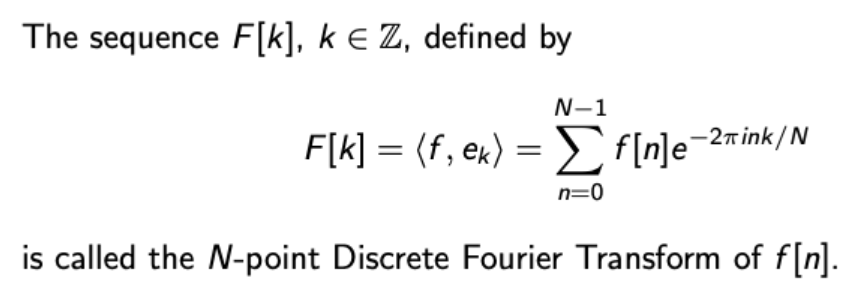

Onde: 
* N = número de amostras;
* n = n-ésima amostra;
* k = frequência atual (0 a N-1 Hz);
* F[k] = números complexos resultantes da DFT;
* f[n] = números complexos do valor do sinal no instante n




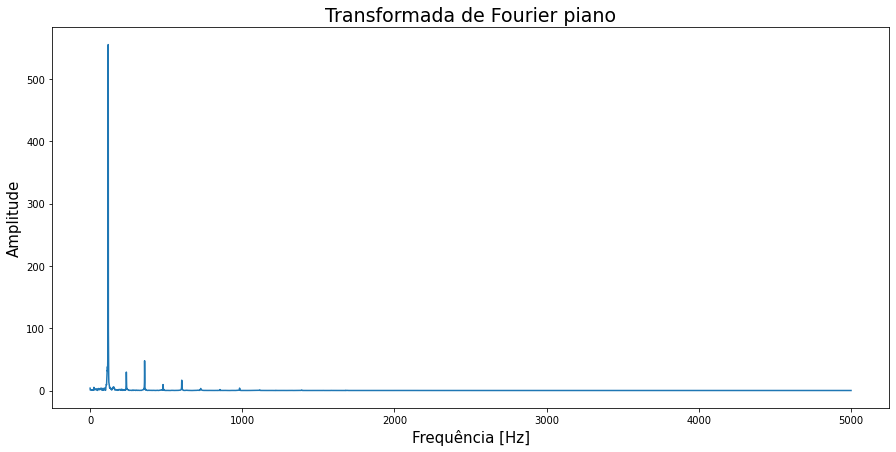

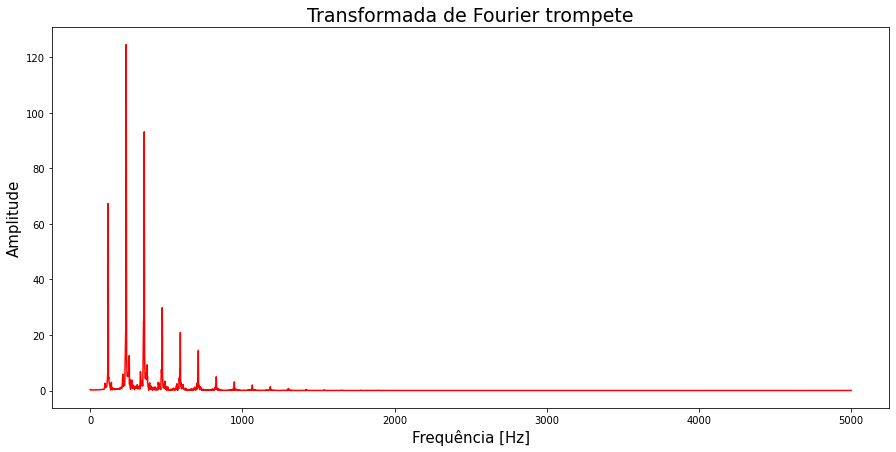

In [ ]:
def dft(y):
    N=10000
    c=np.zeros(N//2+1, complex)
    for k in range(N//2+1):
        for n in range(N):
            c[k]+=y[n]*np.exp(-2j*np.pi*k*n/N)
    return c

p=dft(data_piano)
t=dft(data_trompete)

plt.figure(figsize=[15,7])
plt.plot(abs(p)/len(data_piano))             #normaliza as amplitudes pelo número de amostras (divide por N)
plt.title("Transformada de Fourier piano",fontsize=19)
plt.xlabel('Frequência [Hz]',fontsize=15)
plt.ylabel('Amplitude',fontsize=15)
plt.show()

plt.figure(figsize=[15,7])
plt.plot(abs(t)/len(data_trompete), 'red')
plt.title("Transformada de Fourier trompete", fontsize=19)
plt.xlabel('Frequência [Hz]',fontsize=15)
plt.ylabel('Amplitude',fontsize=15)
plt.show()

### Transformada Rápida de Fourier
Com o algoritmo anterior, foram necessários 7 minutos para construir os dois gráficos da DFT das notas musicais tocadas por um piano e trompete.

É de prever que, com o auxílio de FFTs, o tempo diminua, havendo, claramente, vantagem no seu uso.

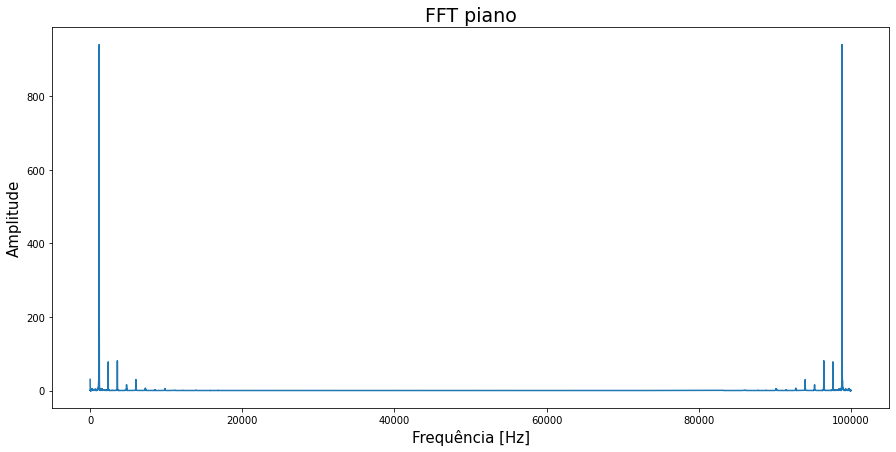

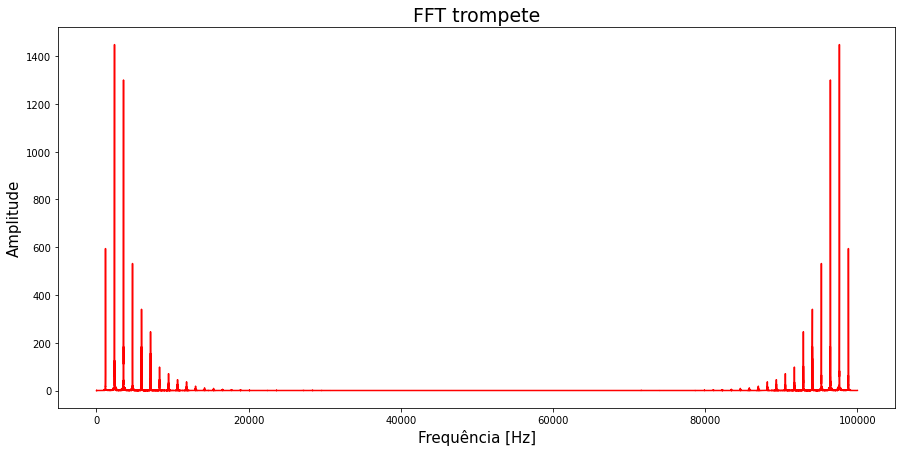

In [ ]:
fft_data_piano=np.fft.fft(data_piano)
fft_data_trompete=np.fft.fft(data_trompete)

plt.figure(figsize=[15,7])
plt.plot(abs(fft_data_piano)/len(data_piano))
plt.title("FFT piano",fontsize=19)
plt.xlabel('Frequência [Hz]',fontsize=15)
plt.ylabel('Amplitude',fontsize=15)
plt.show()

plt.figure(figsize=[15,7])
plt.plot(abs(fft_data_trompete)/len(data_trompete), 'red')
plt.title("FFT trompete", fontsize=19)
plt.xlabel('Frequência [Hz]',fontsize=15)
plt.ylabel('Amplitude',fontsize=15)
plt.show()

### Frequência de amostragem
As amostras são medidas em intervalos fixos. O números de vezes em que se realiza a amostragem numa unidade de tempo é a frequência de amostragem, geralmente medida em Hertz. Assim, dizer que a frequência de amostragem de áudio é de 44100 Hz, significa que a cada segundo de som são tomadas 44100 medidas da variação de voltagem do sinal. Dessa maneira, quanto maior for a taxa de amostragem, mais precisa é a representação do sinal, porém é necessário que se realize mais medições e que se utilize mais espaço para armazenar esses valores.

As frequências das notas do piano e do trompete podem ser calculadas com a seguinte equação:

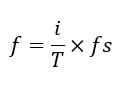

Onde:
* f = frequência
* i = ponto máximo no gráfico FFT
* T = número de amostras
* fs = frequência de amostragem



In [ ]:
ind_piano = (abs(fft_data_piano)/10000)[:10000]
freq_piano = int(np.where(ind_piano == max(ind_piano))[0]*(41100/100000))

print('A frequência da nota tocada no piano foi', freq_piano , 'Hz')

ind_trompete = (abs(fft_data_trompete)/10000)[:10000]
freq_trompete = int(np.where(ind_trompete == max(ind_trompete))[0]*(41100/100000))

print('A frequência da nota tocada no trompete foi', freq_trompete, 'Hz')

A frequência da nota tocada no piano foi 489 Hz
A frequência da nota tocada no trompete foi 972 Hz
